# 1. Certificates (do you need any marks on them?)

# 2. Projects!
## presentations in class (thursday)
## Summer school seminar (friday)

# Unsupervised learning
## Iris set without classes

In [1]:
#Importing Package 
import sys
import numpy
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings
dataset = pandas.read_csv('IRIS.csv').drop(['species'],axis=1)
Data=dataset.copy()
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Simplest classification into 2 clusters

Silhouette Coefficient: 0.6127


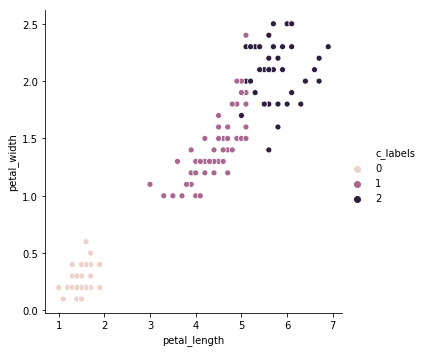

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
kmeans = KMeans(n_clusters=3, random_state=0).fit(Data)
Data['c_labels']=kmeans.labels_
sns.relplot(x='petal_length', y="petal_width", hue="c_labels", markers=['o'], data=Data)

print("Silhouette Coefficient:", round(metrics.silhouette_score(Data, kmeans.labels_), 4))

## Test for generated data (4 clusters)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


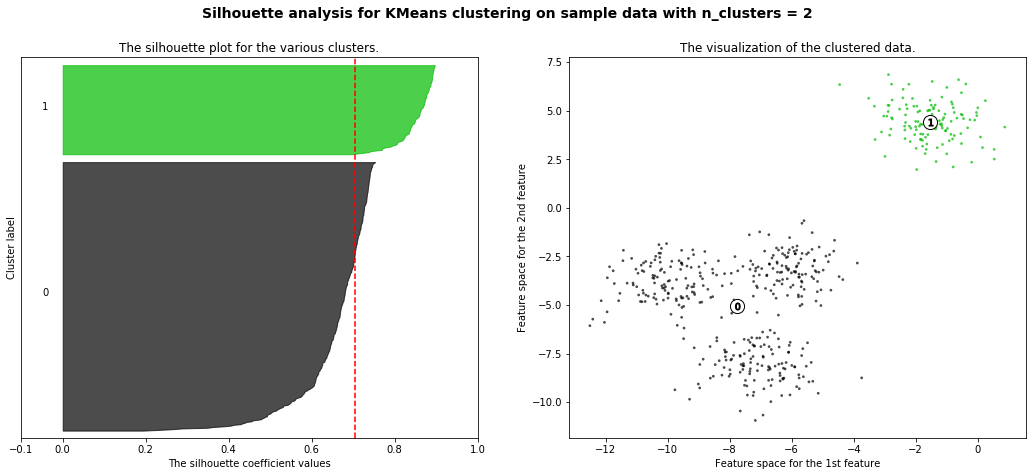

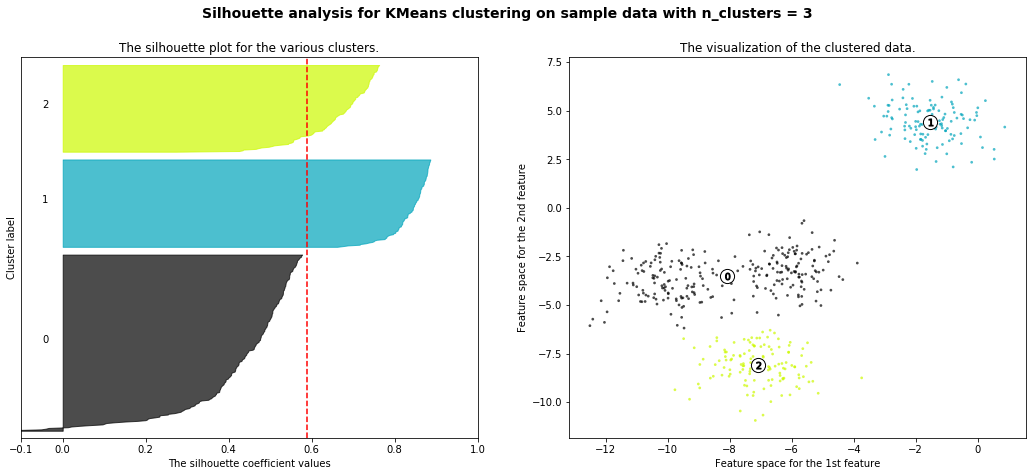

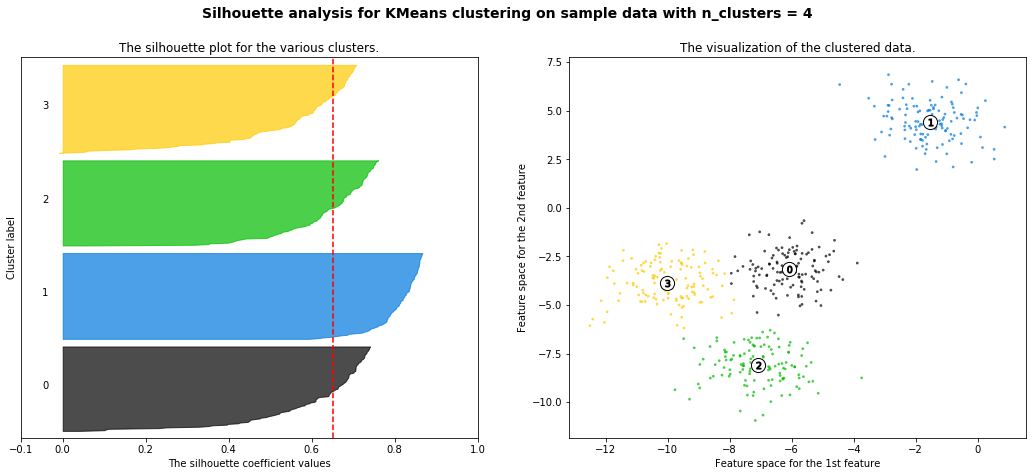

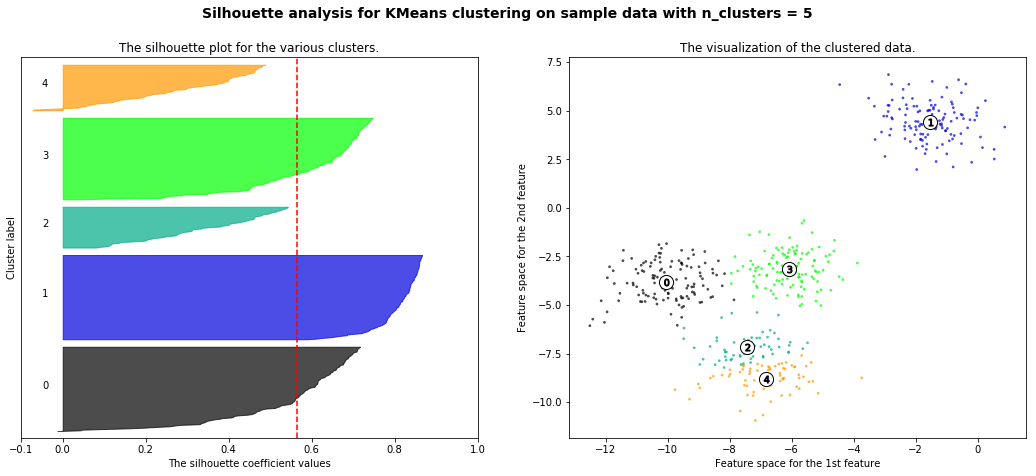

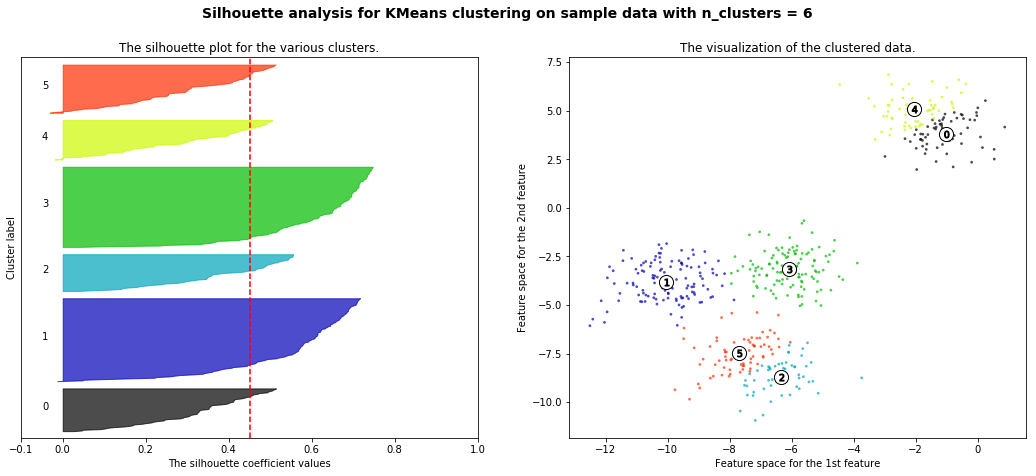

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,  # number of clusters
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6] # how many clusters to check

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


## The same for two columns of Iris dataset, no normalization

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7651755502866581
For n_clusters = 3 The average silhouette_score is : 0.6602760882193361
For n_clusters = 4 The average silhouette_score is : 0.6109733784633249
For n_clusters = 5 The average silhouette_score is : 0.5881403468025436
For n_clusters = 6 The average silhouette_score is : 0.5742586971597542


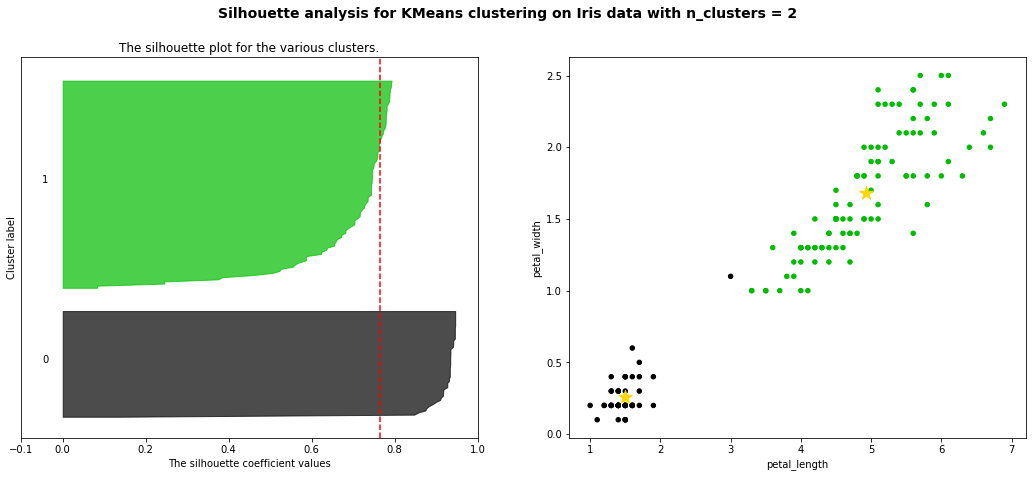

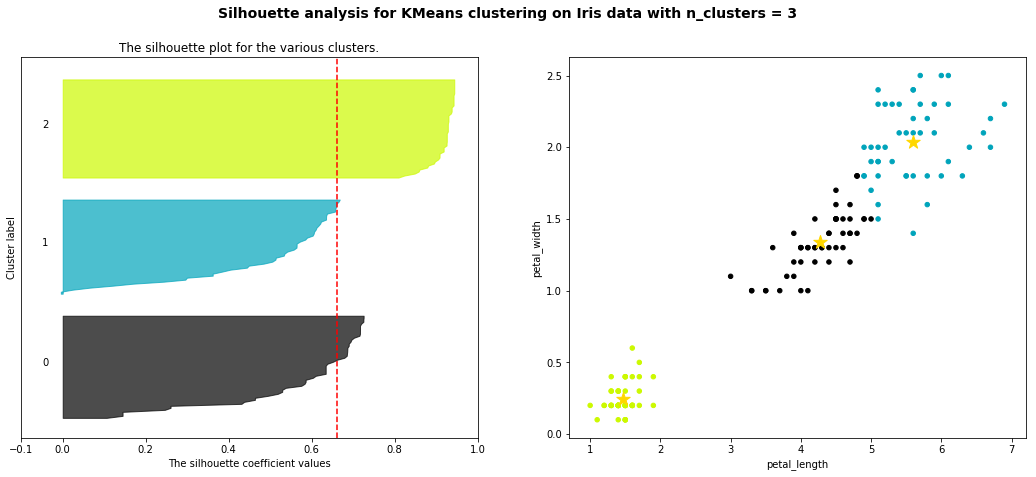

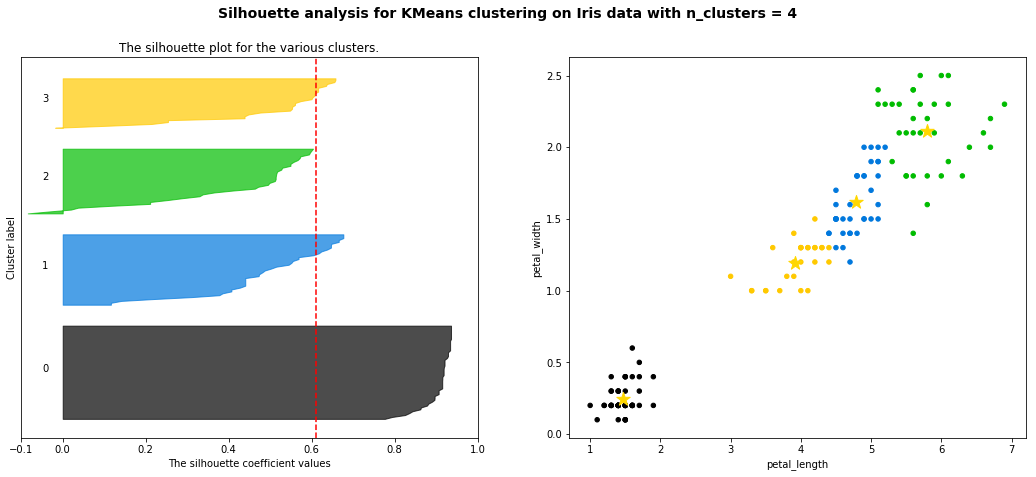

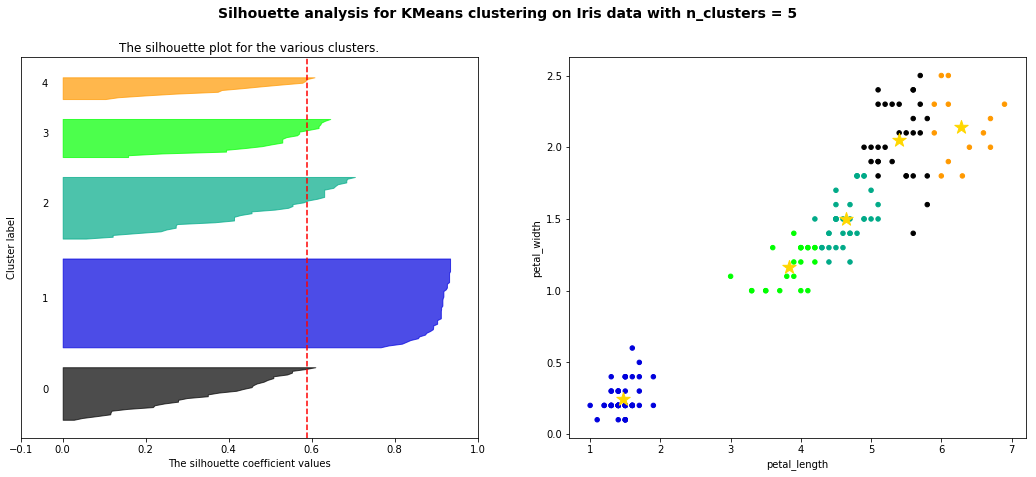

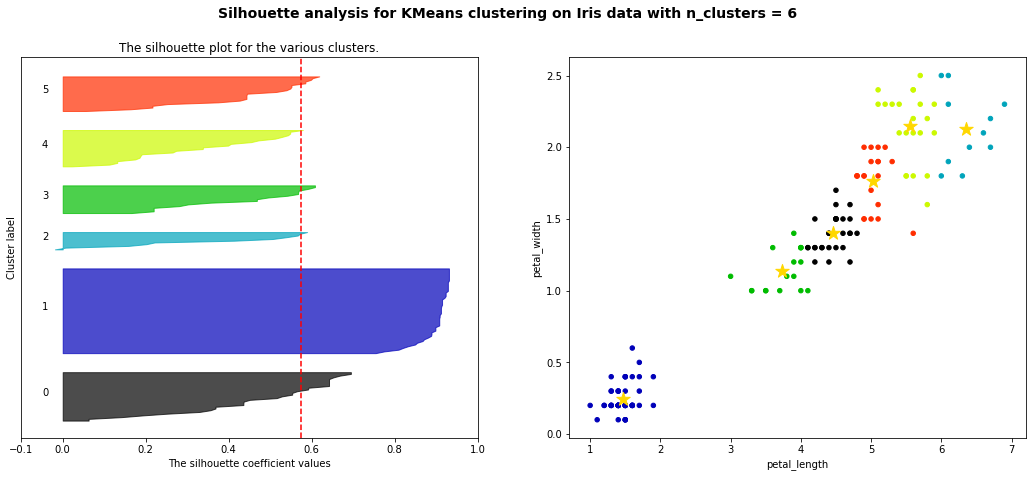

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

print(__doc__)

Data=dataset.copy() # refresh the Data to remove earlier results

# Selecting two columns:
X=Data[['petal_length','petal_width']]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    colors = [cm.nipy_spectral(float(i) / n_clusters) for i in range(n_clusters)]
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    plt.suptitle(("Silhouette analysis for KMeans clustering on Iris data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    X1=X.assign(c_labels=cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    X1.plot(kind="scatter", x='petal_length', y='petal_width',c = X1['c_labels'].map(lambda p: colors[p]),ax=ax2)
    ## Cluster centers:
    centers = pd.DataFrame(clusterer.cluster_centers_,columns=X.columns)
    centers.plot(kind='scatter',x='petal_length',y='petal_width',s=200,marker='*',c='gold',ax=ax2)

## Normalization:

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()  
# Just scale the whole set of data
Data=dataset.copy()
scaler.fit(Data)
X = scaler.transform(Data)
# apply it also later on any data you want to make prediction on

# don't worry about warning here
X=pd.DataFrame(X,columns=Data.columns)
print(type(X))
X.head(5)
X.describe()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


## Now we make clasterization using all standarized columns, but plot only two of them

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.580184463257396
For n_clusters = 3 The average silhouette_score is : 0.4589717867018717
For n_clusters = 4 The average silhouette_score is : 0.38912159486904757
For n_clusters = 5 The average silhouette_score is : 0.34767483142797456
For n_clusters = 6 The average silhouette_score is : 0.3397643258436468


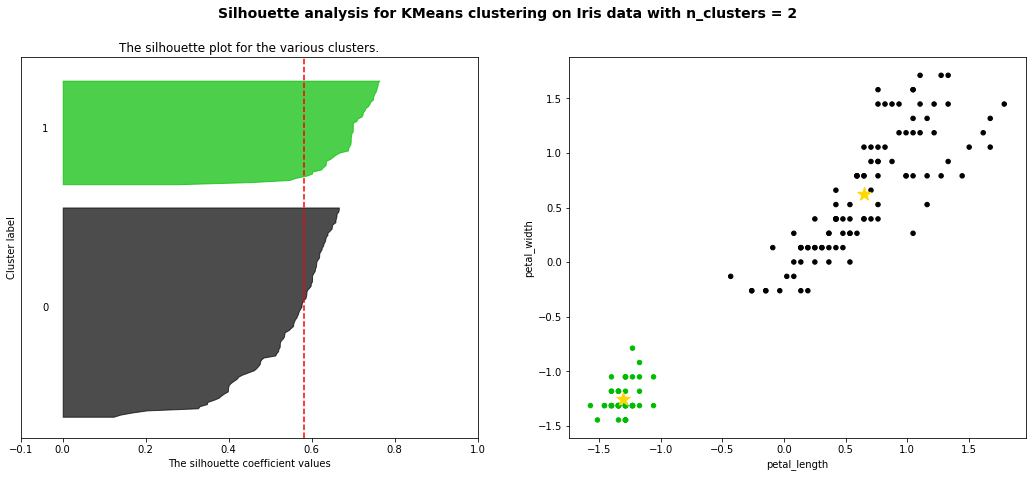

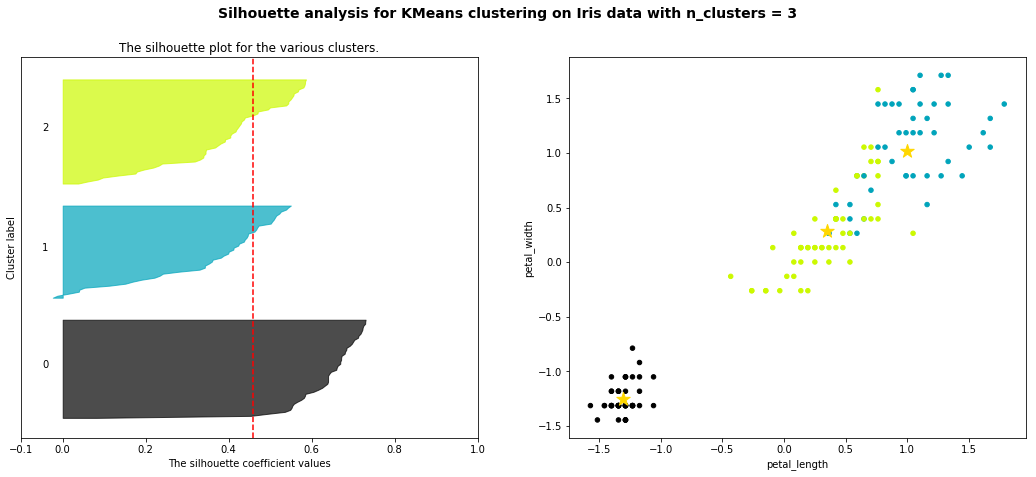

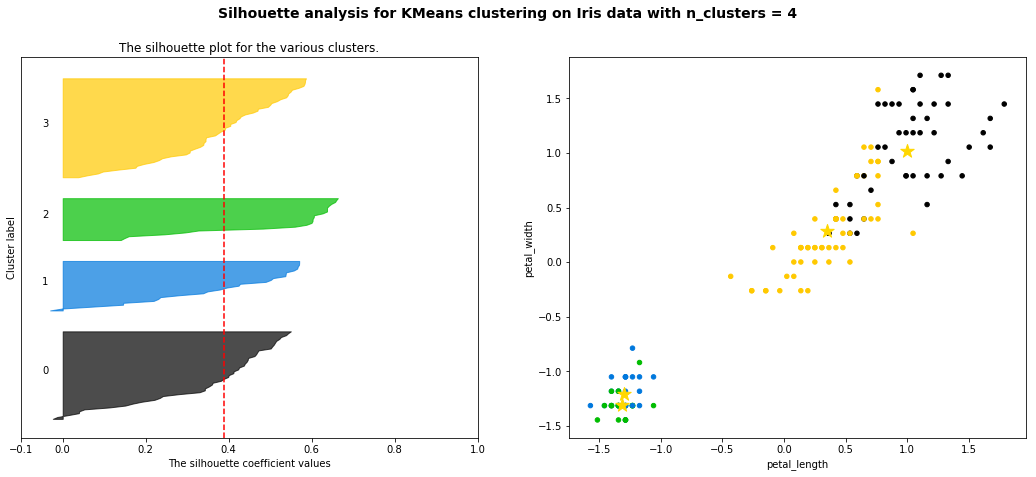

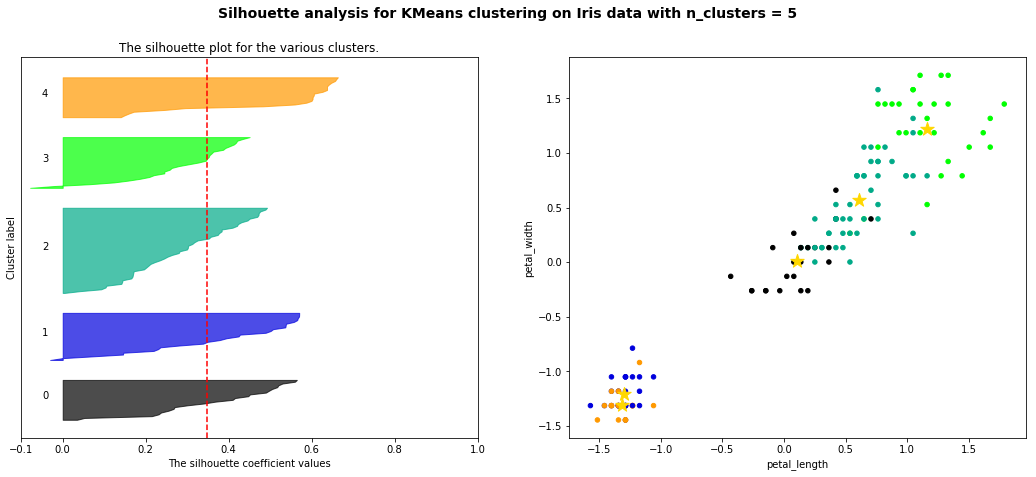

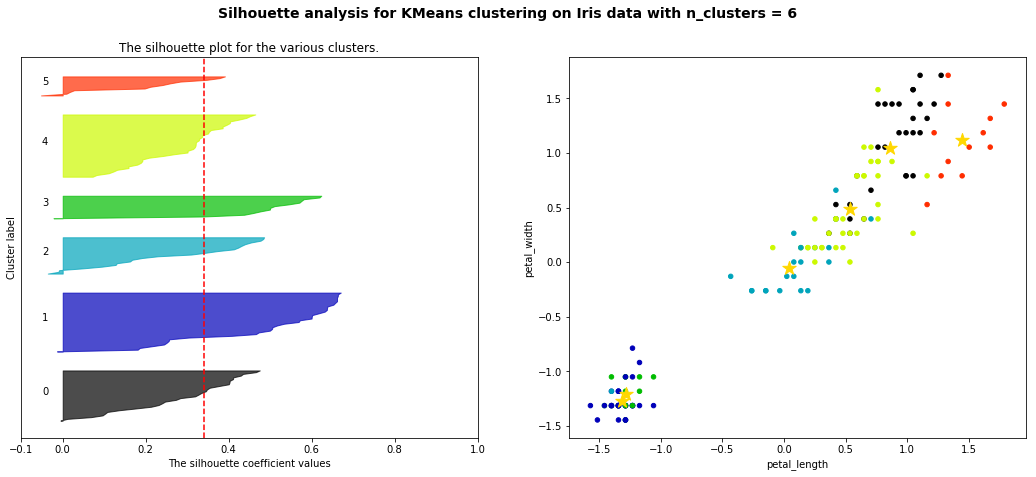

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# X is generated in previous input

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    colors = [cm.nipy_spectral(float(i) / n_clusters) for i in range(n_clusters)]    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    plt.suptitle(("Silhouette analysis for KMeans clustering on Iris data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    X1=X.assign(c_labels=cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    X1.plot(kind="scatter", x='petal_length', y='petal_width',c = X1['c_labels'].map(lambda p: colors[p]),ax=ax2)
    ## Cluster centers:
    centers = pd.DataFrame(clusterer.cluster_centers_,columns=X.columns)
    centers.plot(kind='scatter',x='petal_length',y='petal_width',s=200,marker='*',c='gold',ax=ax2)

## How to select optimal number of clusters - different way

without standarization:

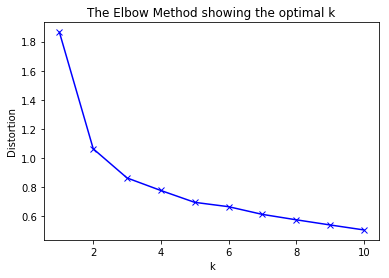

Optimal k is 3...


In [7]:
from scipy.spatial.distance import cdist
N=10 # maximal considered number of clusters
Data=dataset.copy() #data is not normalized (which is rather wrong)
# k means determine k:
distortions = [0]*N
for k in range(N):
    kmeanModel = KMeans(n_clusters=k+1).fit(Data)
    kmeanModel.fit(X)
    distortions[k]=(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(np.array(range(N))+1, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print('Optimal k is 3...')

with standarization:

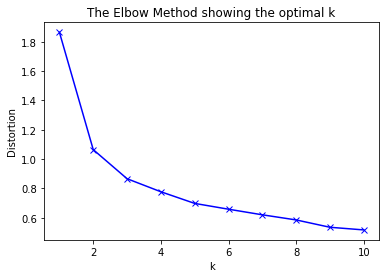

Optimal k is 3


In [9]:
from scipy.spatial.distance import cdist
N=10 # maximal considered number of clusters

from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()  
# Just scale the whole set of data
Data=dataset.copy()
scaler.fit(Data)  
X = scaler.transform(Data)
# apply it also later on any data you want to make prediction on

# don't worry about warning here
X=pd.DataFrame(X,columns=Data.columns)

# k means determine k:
distortions = [0]*N
for k in range(N):
    kmeanModel = KMeans(n_clusters=k+1).fit(Data)
    kmeanModel.fit(X)
    distortions[k]=(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(np.array(range(N))+1, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print('Optimal k is 3')

C:\Users\IVk241\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


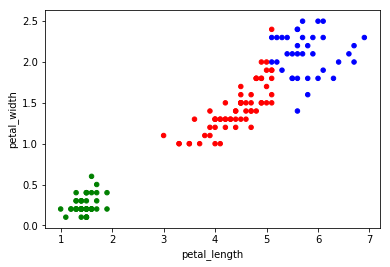

In [10]:
Data=dataset.copy()
colors=['red','green','blue','pink','purple']
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
X1=Data.assign(c_labels=model.fit_predict(Data))
X1.plot(kind='scatter',x='petal_length',y='petal_width', c=X1['c_labels'].map(lambda p: colors[p]))

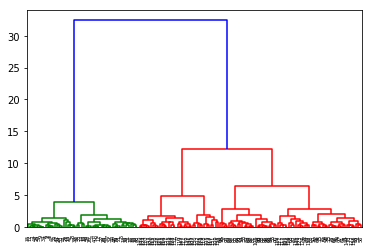

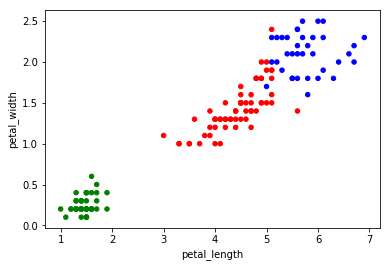

In [11]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# refresh Data
Data=dataset.copy()
# create dendrogram (can be skipped):
dendrogram = sch.dendrogram(sch.linkage(Data, method='ward'))
# make clustering:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# assign data to clusters:
X1=Data.assign(c_labels=model.fit_predict(Data))
# plot clusters:
X1.plot(kind='scatter',x='petal_length',y='petal_width', c=X1['c_labels'].map(lambda p: colors[p]))

# Lets examine classes we obtained:

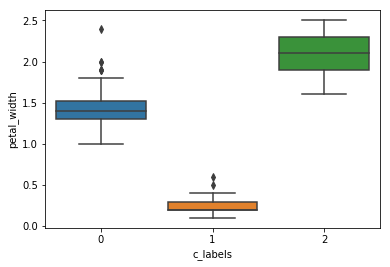

In [12]:
sns.boxplot(x='c_labels', y='petal_width', data=X1)

C:\Users\IVk241\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\IVk241\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


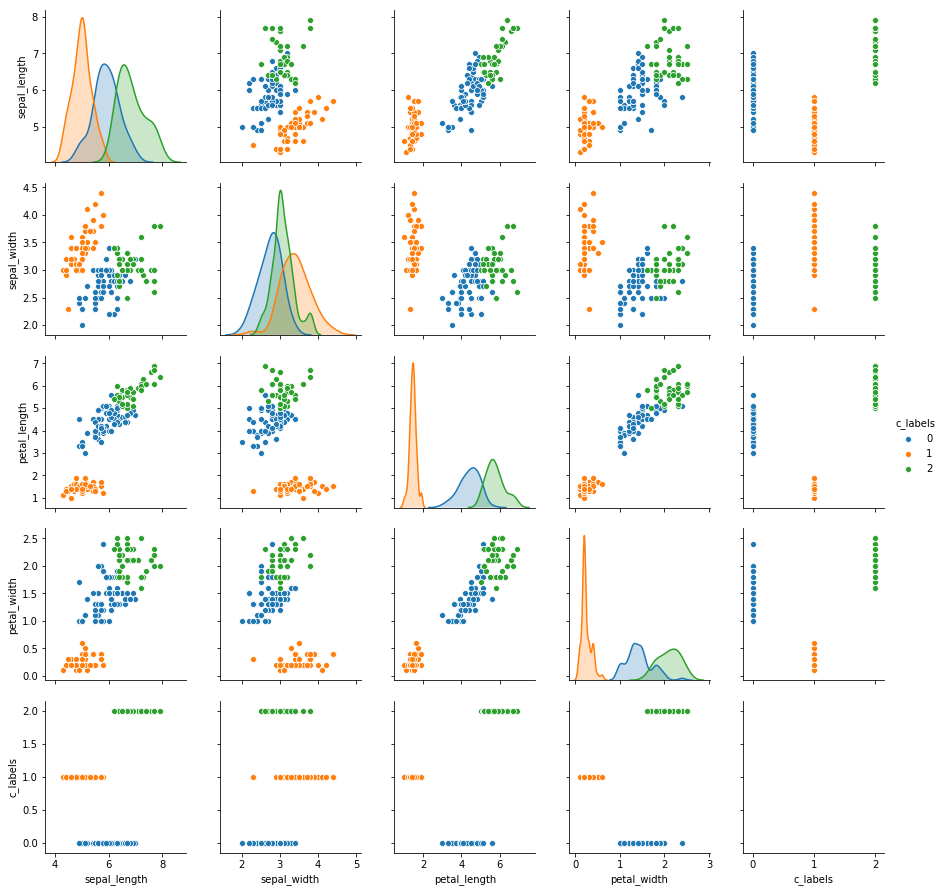

In [13]:
sns.pairplot(data=X1, hue='c_labels')

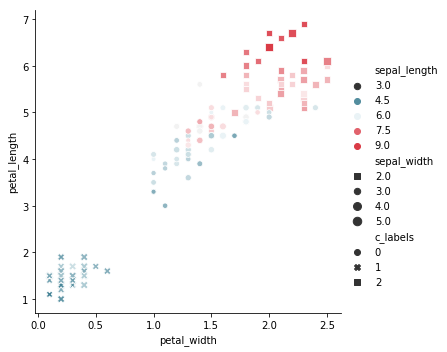

In [14]:
palette=sns.diverging_palette(220,10,as_cmap=True)
sns.relplot(x='petal_width',y='petal_length', hue='sepal_length',palette=palette, size='sepal_width', style='c_labels', data=X1)

# Exercises
## 1. Choose datasets for project
## 2. Start making your projects